In [ ]:
# Input file name with path
input_file_name = 'cardio_train.csv'

# Target class name
input_target_class = "cardio"

# Columns to be removed
input_drop_col = "id"

# Col datatype selection
input_datatype_selection = 'auto'  # use auto if you don't want to provide column names by data type else use 'manual'

# Categorical columns
#input_cat_columns = ['Surname', 'Geography', 'Gender', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Numerical columns
input_num_columns = ['age', 'gender', 'height', 'weight', 'ap_hi','ap_lo','cholestrol','gluc','smoke','alco','active','cardio']

# Encoding technique
input_encoding = 'LabelEncoder' # choose the encoding technique from 'LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder' and 'FrequencyEncoder'

# Handle missing value
input_treat_missing_value = 'drop' # choose how to handle missing values from 'drop','inpute' and 'ignore'

# Machine learning algorithm
input_ml_algo = 'RandomForestClassifier' # choose the ML algorithm from 'LogisiticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier' and LGBMClassifier'

In [ ]:
# Import libraries

# Data Manipulation
import numpy as np
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   imblearn.over_sampling import RandomOverSampler
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [ ]:
# Read data in form of a csv file
df = pd.read_csv('cardio_train.csv', sep=';')

# First 5 rows of the dataset
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Dimension of the data
df.shape

(70000, 13)

In [ ]:
# Summary of the dataset
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Missing values for every column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
# Remove extra columns
col_remove = input_drop_col
df = df.drop(col_remove, axis = 1)

In [ ]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)

else:
    #categorical_columns = input_cat_columns
    #print("Categorical Columns : ", categorical_columns)

    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['gender', 'smoke', 'alco', 'active', 'cardio']
Categorical Columns :  []
Numerical Columns :  ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


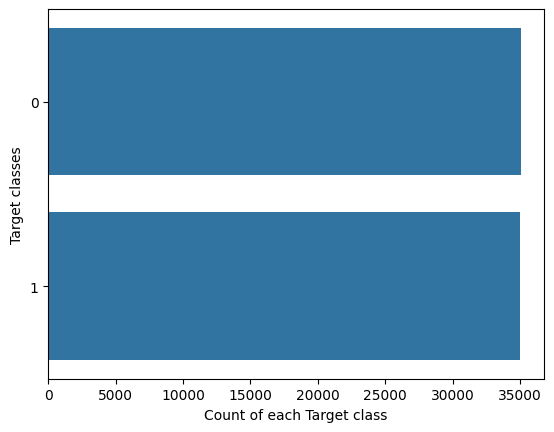

In [ ]:
# Check distribution of target class
sns.countplot(y=df[input_target_class] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

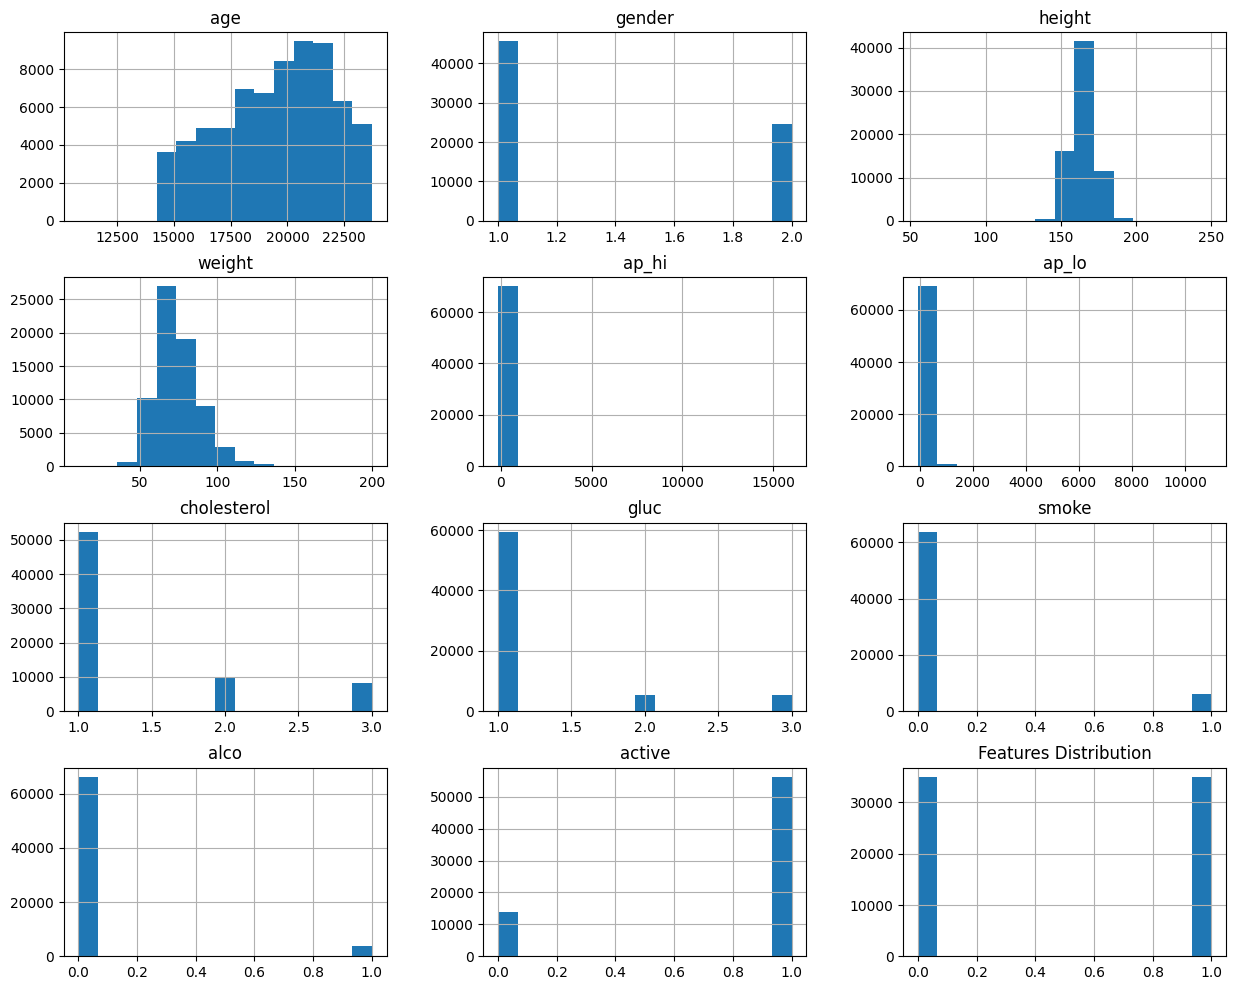

In [ ]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

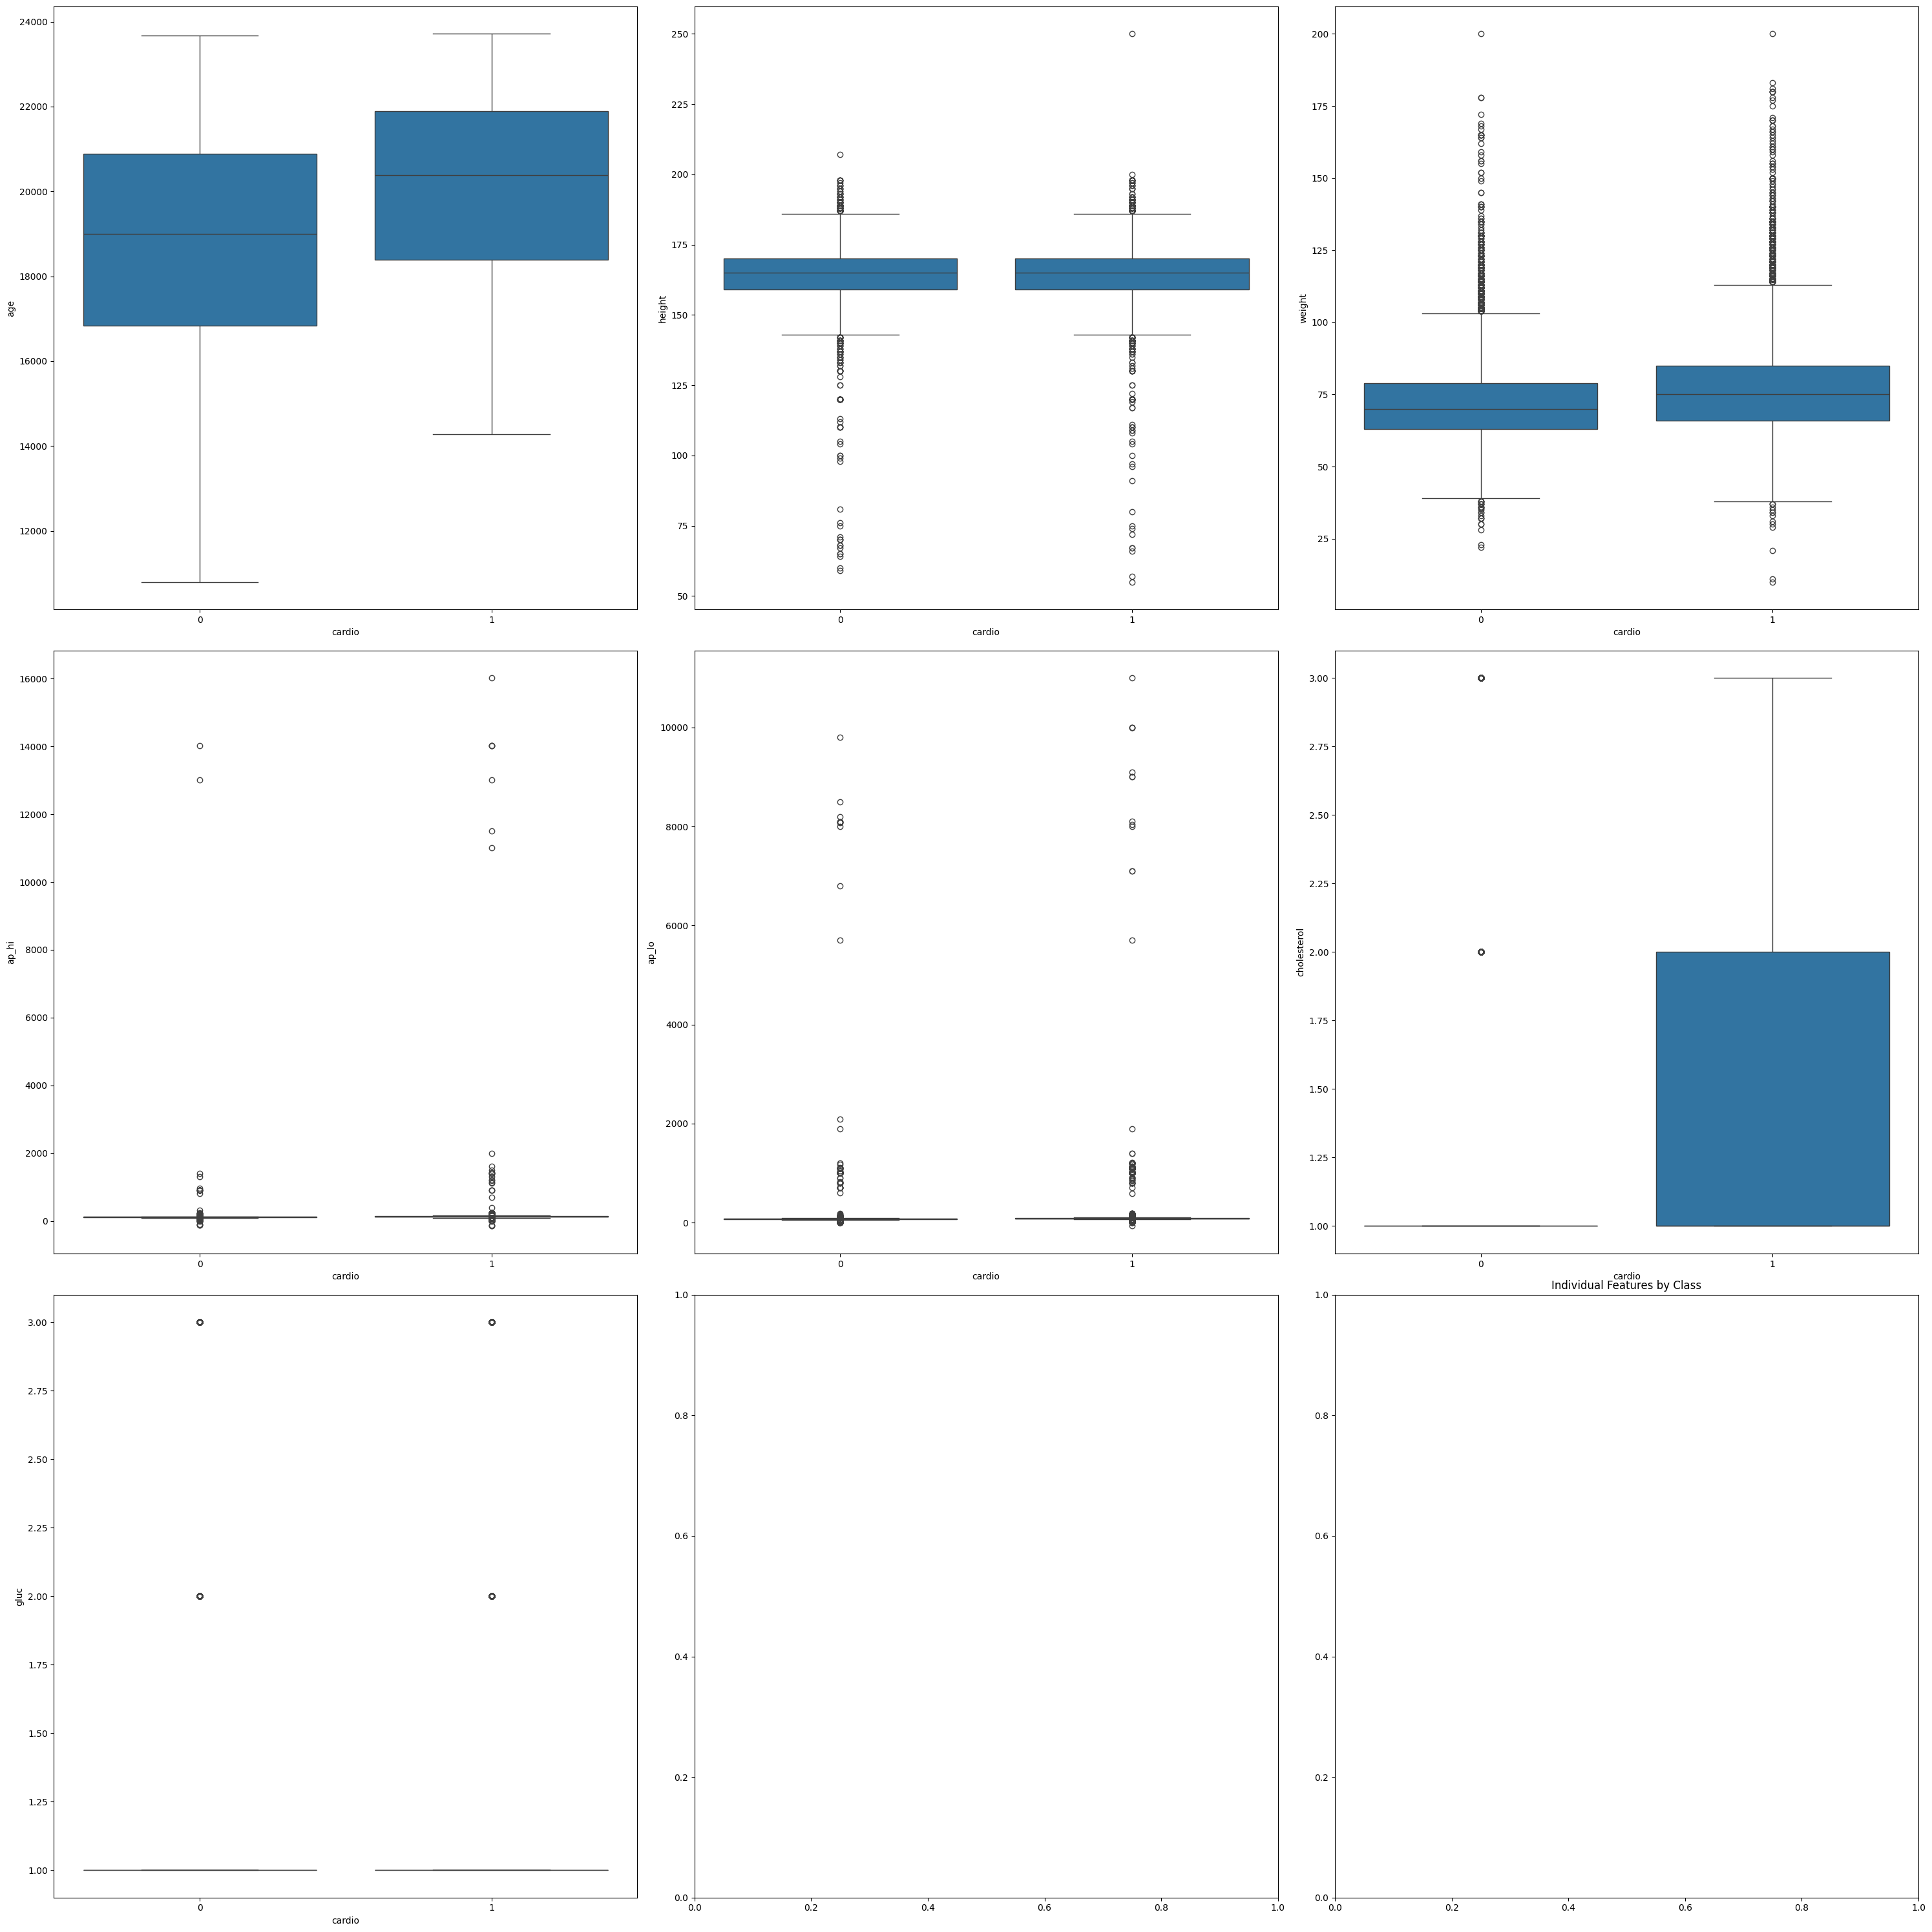

In [ ]:
# Check the distribution of y variable corresponding to every x variable
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,30))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df[input_target_class], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

In [ ]:
# Select how you wish to treat missing values according to the input provided
if input_treat_missing_value == 'drop':

    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif input_treat_missing_value == 'impute':

    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in categorical_columns:
        df[col] = df[col].fillna("Unknown")
elif input_treat_missing_value == 'ignore':
    print("Ignore missing values")

(70000, 12)


In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
categorical_columns.remove(input_target_class)
categorical_columns

['gender', 'alco', 'active', 'smoke']

In [ ]:
# Select the encoding technique according to the input provided
if input_encoding == "LabelEncoder":
    # Use LabelEncoder function from sklearn
    le = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))

elif input_encoding == "OneHotEncoder":
    # Use pandas get dummies function to one hot encode
    df = pd.get_dummies(df, columns=categorical_columns)

elif input_encoding == "OrdinalEncoder":
    # Use OrdinalEncoder function from sklearn
    oe = OrdinalEncoder()
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
elif input_encoding == "FrequencyEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency
        fq = df.groupby(variable).size()/len(df)
        # mapping values to dataframe
        df.loc[:, "{}".format(variable)] = df[variable].map(fq)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,17474,0,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class],axis=1)
y = df[input_target_class]

In [ ]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):

    scaler = StandardScaler()

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns

    return scaled_data

In [ ]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607


In [ ]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Select the algorithm according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier()
elif input_ml_algo == 'RandomForestClassifier':
    model = RandomForestClassifier()
elif input_ml_algo == 'XGBClassifier':
    model = XGBClassifier()
elif input_ml_algo == 'LGBMClassifier':
    model = LGBMClassifier()

In [ ]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestClassifier()

In [ ]:
# Predict class for test dataset
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [0 0 0 ... 0 1 0]
Y probability predicted :  [0.221, 0.17, 0.01, 0.23, 0.31]


In [ ]:
# Define a function to compute various evaluation metrics
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    #print("\n ROC curve : \n")
    sns.set_style("white")
    #plot_roc_curve(model, x_test, y_actual)
    plt.show()

In [ ]:
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)


 Accuracy Score : 
  0.7137142857142857

 AUC Score : 
 0.7727812145145332

 Confusion Matrix : 
  [[7707 2832]
 [3180 7281]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10539
           1       0.72      0.70      0.71     10461

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



In [ ]:
# Over sample the minority class
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

y_ros.value_counts()

cardio
0    35021
1    35021
Name: count, dtype: int64

In [ ]:
# Define the function to build model on balanced dataset
def classification_model(X, y):

    scaled_X = scale_data(X)

    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]

    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

    return model

In [ ]:
# Build model on balanced data and get evaluation metrics
model = classification_model(X_ros, y_ros)


 Accuracy Score : 
  0.7104649502688811

 AUC Score : 
 0.7701494613492079

 Confusion Matrix : 
  [[7647 2821]
 [3263 7282]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.73      0.72     10468
           1       0.72      0.69      0.71     10545

    accuracy                           0.71     21013
   macro avg       0.71      0.71      0.71     21013
weighted avg       0.71      0.71      0.71     21013



In [ ]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [ ]:
# Define the parameters gird for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           }

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]
                           }

# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 }

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

In [ ]:
# Select the model and parameter grid according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model       = DecisionTreeClassifier()
    param_grid  = param_grid_decision_tree
elif input_ml_algo == 'RandomForestClassifier':
    model       = RandomForestClassifier()
    param_grid  = param_grid_random_forest
elif input_ml_algo == 'XGBClassifier':
    model       = XGBClassifier()
    param_grid  = param_grid_xgb
elif input_ml_algo == 'LGBMClassifier':
    model       = LGBMClassifier()
    param_grid  = param_grid_lgbm

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define your model and parameter grid
# model = ...
# param_grid = ...

# Run grid search without parallel processing
grid = GridSearchCV(model, param_grid, refit=True, verbose=3, n_jobs=1)

# Fit the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.738 total time=   5.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.736 total time=   3.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.739 total time=   3.4s
[CV 4/5] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.729 total time=   3.6s
[CV 5/5] END max_depth=10, min_samples_leaf=1, n_estimators=100;, score=0.739 total time=   3.0s
[CV 1/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.738 total time=   9.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.735 total time=  13.4s
[CV 3/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.738 total time=  16.3s
[CV 4/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.731 total time=   7.2s
[CV 5/5] END max_depth=10, min_samples_leaf=1, n_estimators=200;,

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [ ]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [1 0 1 ... 0 1 0]
Y probability predicted :  [0.8670134157511188, 0.24192898415942207, 0.8866498682745348, 0.28383362736415263, 0.521091790243582]


In [ ]:
compute_evaluation_metric(grid, X_test, y_test, y_pred, y_pred_prod)


 Accuracy Score : 
  0.7292152477038024

 AUC Score : 
 0.7957066381990462

 Confusion Matrix : 
  [[8093 2375]
 [3315 7230]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74     10468
           1       0.75      0.69      0.72     10545

    accuracy                           0.73     21013
   macro avg       0.73      0.73      0.73     21013
weighted avg       0.73      0.73      0.73     21013



In [ ]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(max_depth=20, min_samples_leaf=5)